<a href="https://colab.research.google.com/github/mohamedahmedsalah002/Heart_disease/blob/main/covid_19_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import *

## **Read Dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_path = '/content/drive/MyDrive/cnn/Covid19-dataset/test'
test_path = '/content/drive/MyDrive/cnn/Covid19-dataset/test'

In [6]:
image_classes = os.listdir('/content/drive/MyDrive/cnn/Covid19-dataset/test')
image_classes

['Viral Pneumonia', 'Covid', 'Normal']

## **Data Visualization**

In [7]:
for i, category in enumerate(image_classes):
        image_path = train_path + '/' + category
        print ("image_path ------->  ",image_path)
        images_in_folder = os.listdir(image_path)
        print ("images_in_folder ------->  ",images_in_folder)
        first_image = images_in_folder[0]
        print ("images_in_folder[0] ------->  ",images_in_folder[0])
        first_image_path = image_path + '/' + first_image
        print ("first_image_path ------->  ",first_image_path)
        img = image.load_img(first_image_path)
        print (img)

image_path ------->   /content/drive/MyDrive/cnn/Covid19-dataset/test/Viral Pneumonia
images_in_folder ------->   ['0109.jpeg', '0107.jpeg', '0106.jpeg', '0111.jpeg', '0101.jpeg', '0104.jpeg', '0120.jpeg', '0119.jpeg', '0103.jpeg', '0117.jpeg', '0118.jpeg', '0108.jpeg', '0116.jpeg', '0112.jpeg', '0115.jpeg', '0114.jpeg', '0110.jpeg', '0102.jpeg', '0113.jpeg', '0105.jpeg']
images_in_folder[0] ------->   0109.jpeg
first_image_path ------->   /content/drive/MyDrive/cnn/Covid19-dataset/test/Viral Pneumonia/0109.jpeg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1248x816 at 0x7AC6FE067C40>
image_path ------->   /content/drive/MyDrive/cnn/Covid19-dataset/test/Covid
images_in_folder ------->   ['0100.jpeg', '0119.jpeg', '0111.jpg', 'COVID-00012.jpg', '094.png', 'COVID-00022.jpg', '0115.jpeg', '0112.jpg', 'COVID-00033.jpg', '0108.jpeg', 'auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', '0106.jpeg', '0105.png', 'auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Viet

In [8]:
def plot_images(image_classes):
    plt.figure(figsize = (12,12))

    for i, category in enumerate(image_classes):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)

        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image

        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255

        plt.subplot(1,3, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

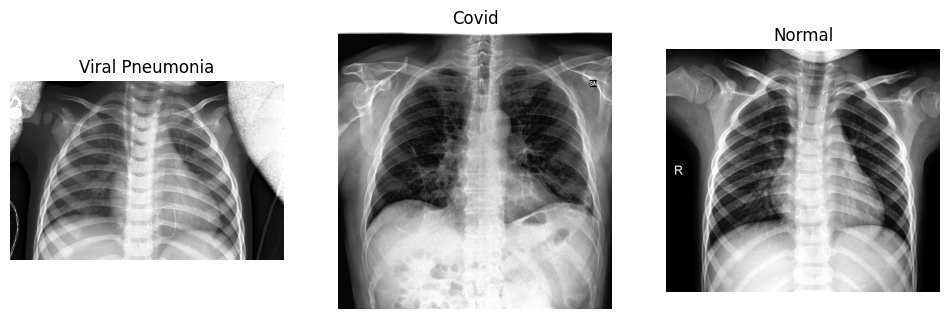

In [9]:
plot_images(image_classes)

## **Image Preprocessing**

In [10]:
image_gen = ImageDataGenerator(rescale = 1/255)

In [11]:
train_data = image_gen.flow_from_directory(train_path,
                                          target_size = (224,224),
                                          )

Found 66 images belonging to 3 classes.


In [12]:
test_data = image_gen.flow_from_directory(test_path,
                                          target_size = (224,224),
                                          )

Found 66 images belonging to 3 classes.


## **Model Building**

In [13]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                activation = 'relu', input_shape = [224,224, 3]))

cnn_model.add(MaxPooling2D(pool_size = (2,2)))

cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                activation = 'relu'))

cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                activation = 'relu'))

cnn_model.add(MaxPooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(128, activation = 'relu'))

cnn_model.add(Dense(3, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Compile & Fit Model**

In [14]:
cnn_model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
# Add Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
# Print model summary
cnn_model.summary()
print(f"Trainable parameters before fine-tuning: {np.sum([tf.keras.backend.count_params(w) for w in cnn_model.trainable_weights])}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,495,875 (24.78 MB)

 Trainable params: 6,495,875 (24.78 MB)

 Non-trainable params: 0 (0.00 B)

Trainable parameters before fine-tuning: 6495875


In [18]:
model_history = cnn_model.fit(train_data,
             epochs = 30,
             validation_data = test_data,
             callbacks=[early_stop])

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 1.0000 - loss: 2.2675e-06 - val_accuracy: 1.0000 - val_loss: 3.6737e-06
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 1.0000 - loss: 3.5634e-06 - val_accuracy: 1.0000 - val_loss: 3.3396e-06
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 1.0000 - loss: 2.8789e-06 - val_accuracy: 1.0000 - val_loss: 3.0759e-06
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 1.0000 - loss: 3.4886e-06 - val_accuracy: 1.0000 - val_loss: 2.8682e-06
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 1.0000 - loss: 2.2430e-06 - val_accuracy: 1.0000 - val_loss: 2.7165e-06
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 1.0000 - loss: 2.3349e-06 - val_accuracy: 1.0000 - val_loss: 2.5991e-06
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 1.0000 - loss: 2.9434e-06 - val_accuracy: 1.0000 - val_loss: 2.4979e-06
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 1.0000 - loss: 2.

## **Model Performance Visualization**

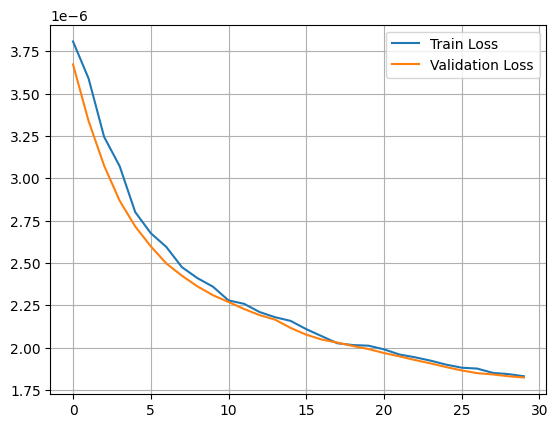

In [22]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

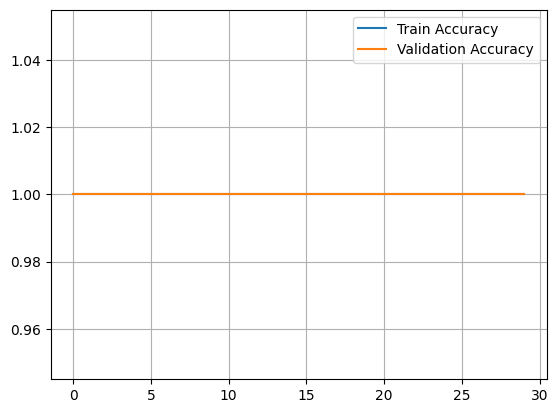

In [23]:
plt.plot(model_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## **Model Evaluation**

## **Make Prediction**

In [24]:
testing_image = '/content/drive/MyDrive/cnn/Covid19-dataset/test/Viral Pneumonia/0107.jpeg'

In [25]:
class_map = dict([value, key] for key, value in train_data.class_indices.items())
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [26]:
import numpy as np
def prediction(testing_image, actual_label):

    #preprocessing image
    test_img = image.load_img(testing_image, target_size = (224,224))
    test_img_array = image.img_to_array(test_img) / 255
    test_img_input = test_img_array.reshape(1, test_img_array.shape[0],
                                           test_img_array.shape[1],
                                           test_img_array.shape[2])


    #make prediction
    predicted_class = np.argmax(cnn_model.predict(test_img_input))
    class_img = class_map[predicted_class]

    plt.figure(figsize = (4,4))
    plt.imshow(test_img_array)
    plt.title("Actual Label : {} , Predicted Label : {}".format(actual_label, class_img))

    plt.grid()
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


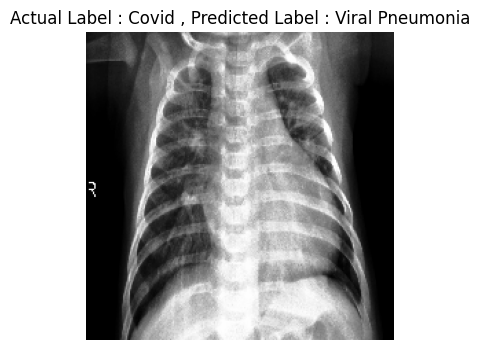

In [27]:
prediction(testing_image, actual_label = 'Covid')

In [28]:
cnn_model.save("Covid_19_model.h5")

## Load the model

In [29]:
from tensorflow.keras.models import load_model

# Load the model
model_new = load_model("Covid_19_model.h5")


In [30]:
import numpy as np
def prediction_1(testing_image, actual_label):

    #preprocessing image
    test_img = image.load_img(testing_image, target_size = (224,224))
    test_img_array = image.img_to_array(test_img) / 255
    test_img_input = test_img_array.reshape(1, test_img_array.shape[0],
                                           test_img_array.shape[1],
                                           test_img_array.shape[2])


    #make prediction
    predicted_class = np.argmax(model_new.predict(test_img_input))
    class_img = class_map[predicted_class]

    plt.figure(figsize = (4,4))
    plt.imshow(test_img_array)
    plt.title("Actual Label : {} , Predicted Label : {}".format(actual_label, class_img))

    plt.grid()
    plt.axis('off')

In [33]:
testing_image_1 = "/content/drive/MyDrive/cnn/Covid19-dataset/test/Covid/0108.jpeg"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


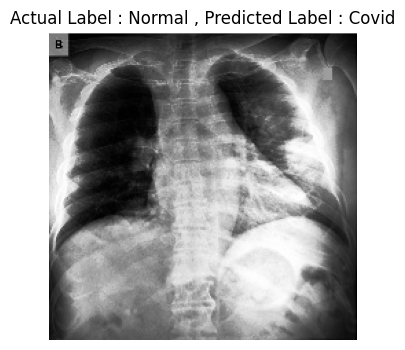

In [34]:
prediction(testing_image_1, actual_label = 'Normal')